<a href="https://www.kaggle.com/code/simronw/loan-default-prediction-using-logistic-regression?scriptVersionId=180817774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Lets connect on [Linkedin](https://www.linkedin.com/in/simronwaskar/)

# **Loan Default Prediction using Logistic Regression**

[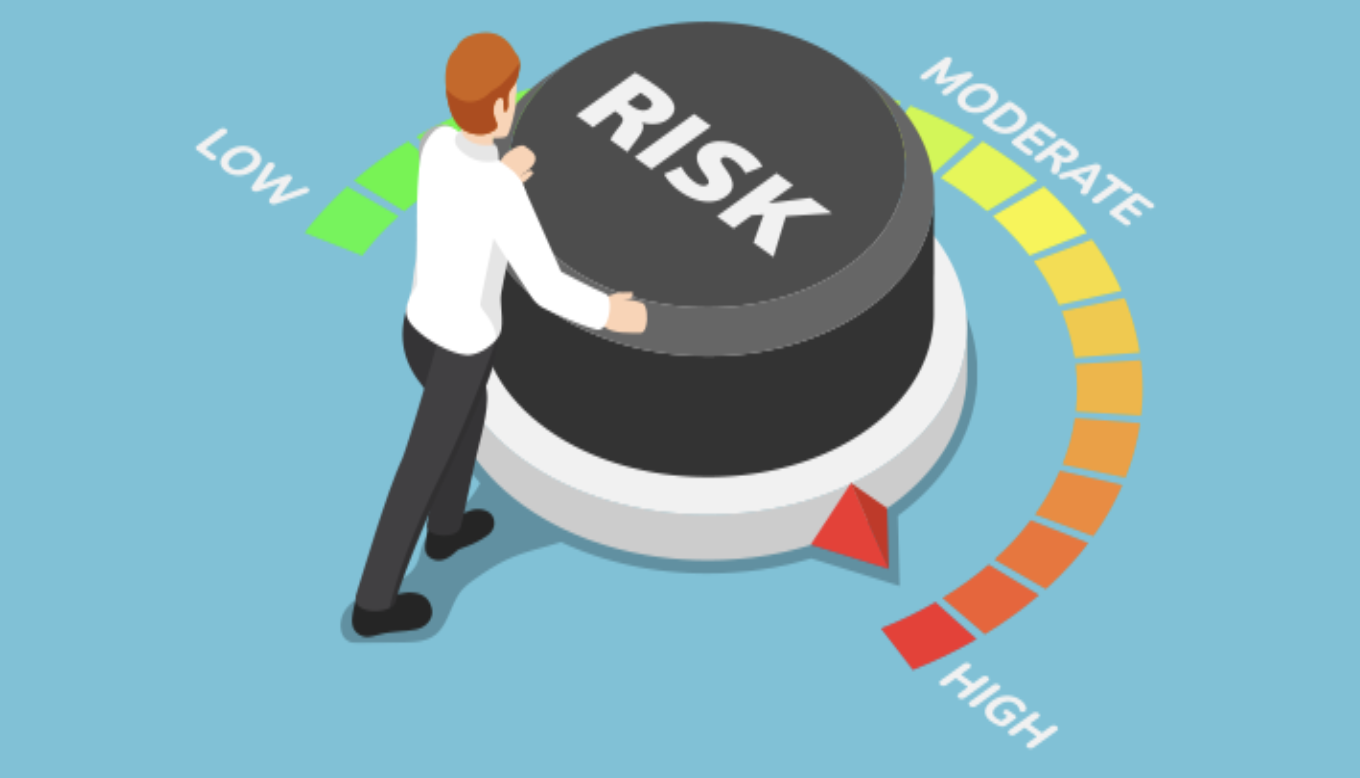](http://)
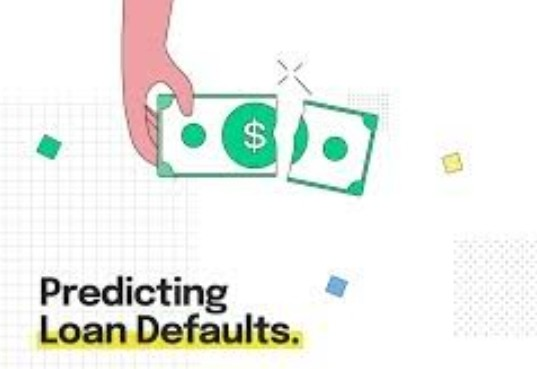
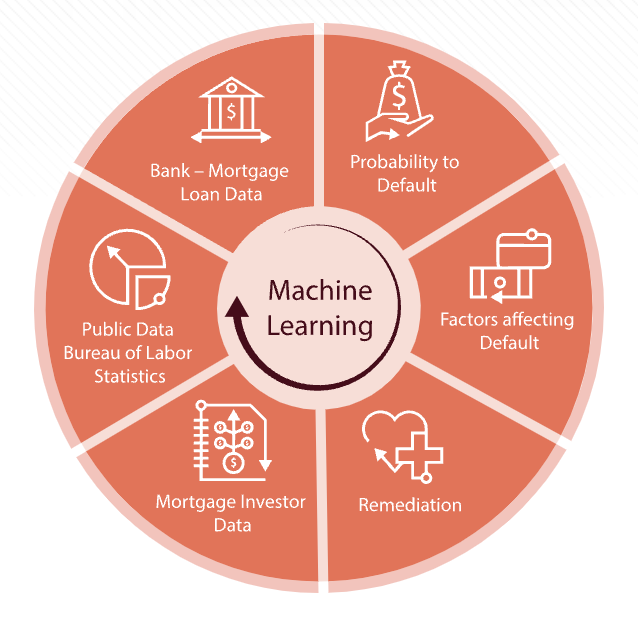

[](http://)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-prediction/Default_Fin.csv


# **Collect the data**

In [2]:
# Importing loan dataset into pandas dataframe
df = pd.read_csv("/kaggle/input/loan-default-prediction/Default_Fin.csv")

In [3]:
# Displaying first 10 rows in the dataset
df.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


# **Explore the data**

In [4]:
# Displaying summary statistic of dataset
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [5]:
# Display the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [6]:
# Number of rows and columns
df.shape

(10000, 5)

In [7]:
# Dropping unwanted columns
df.drop('Index', axis = 1, inplace=True)

In [8]:
# Renaming the columns for better understanding
df.rename(columns={'Defaulted?': "Defaulted"}, inplace=True)

In [9]:
# Checking for null values in the dataset
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

In [10]:
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


<Axes: xlabel='Defaulted', ylabel='Annual Salary'>

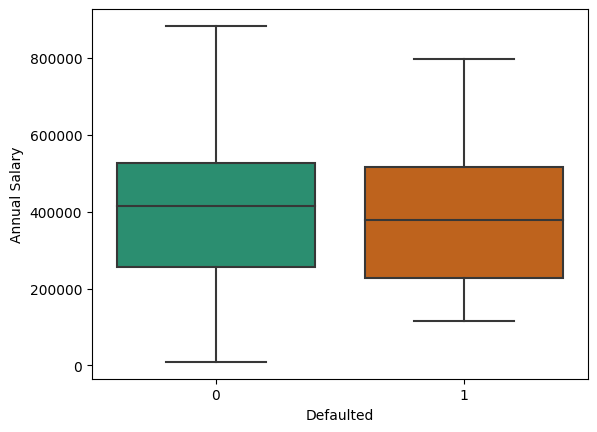

In [11]:
# Analysing difference in annual salary between those that did not default on their loan 0 and those that did default 1. 
ax = sns.boxplot(y="Annual Salary", x='Defaulted', data = df, palette='Dark2')
ax

<Axes: xlabel='Defaulted', ylabel='Bank Balance'>

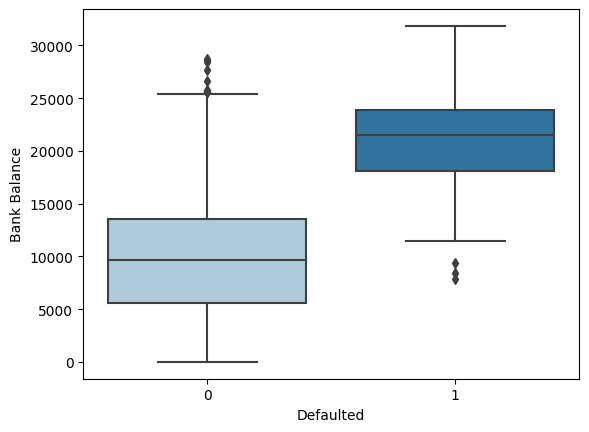

In [12]:
# Analysing difference in Bank Balance between those that did not default on their loan 0 and those that did default 1. 
bx = sns.boxplot(y="Bank Balance", x='Defaulted', data=df, palette="Paired")
bx

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Employed', ylabel='Defaulted'>

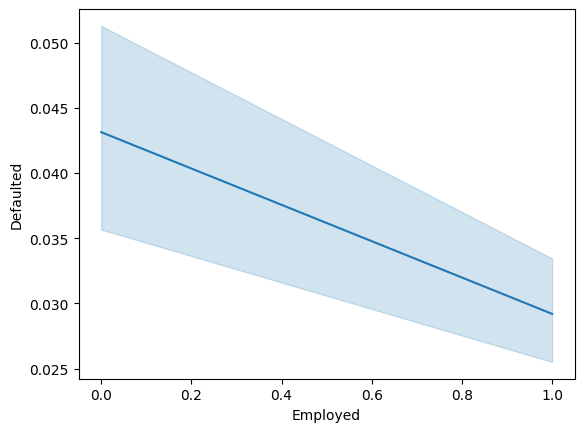

In [13]:
# Analysing the relationship between Employement and loan default 
cx = sns.lineplot(x="Employed", y="Defaulted", data=df)
cx

<Axes: xlabel='Annual Salary', ylabel='Defaulted'>

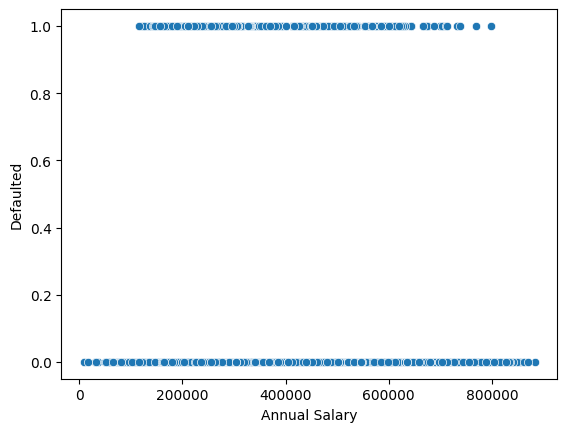

In [14]:
# Analysing relationship between Annual Salary and Defaulter
ax = sns.scatterplot(x="Annual Salary", y='Defaulted', data = df)
ax

<Axes: xlabel='Bank Balance', ylabel='Defaulted'>

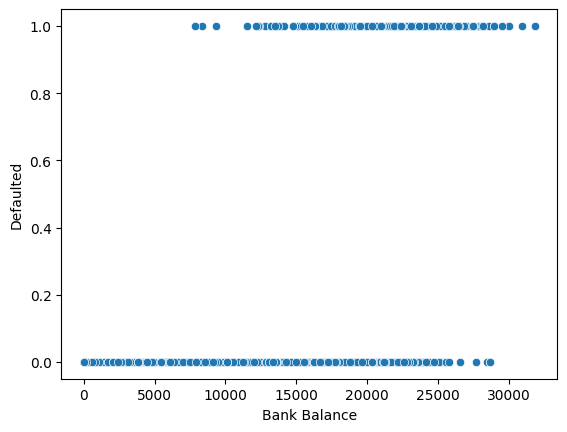

In [15]:
# Analysing relationship between Bank balance and Defaulter
bx = sns.scatterplot(x="Bank Balance", y='Defaulted', data=df)
bx

Looking at these two scatterplots, we can easily imagine a sigmoid curve that fits the data. This tells us that a logistic regression function would model the relationship between the predictors (`Annual Salary` and `Bank Balance`) and the response (`Defaulted`) well.

# **Prepare the data**

Our primary objective in this step is to split our data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model.

Before we split the data, we first need to separate the dependent variable from the independent variables.

In [16]:
# Creating a pandas Series called `y` for the dependent variable.
y = df["Defaulted"]

In [17]:
# Creating a pandas DataFrame called `X` for the independent variables.
X = df[['Bank Balance', 'Annual Salary']]

In [18]:
# import the `train_test_split()` function from the `sklearn.model_selection` subpackage. 
from sklearn.model_selection import train_test_split

Using the `train_test_split()` function, we can split `X` and `y` into `X_train`, `X_test`, `y_train` and `y_test`.

Note that within the `train_test_split()` function, we will set:

* `train_size` to `0.7`. This means we want $70\%$ of the original data to be assigned to the training data while $30\%$ is assigned to the test data. 

* `stratify` as `y`, which means that we want the data split using a stratified random sampling approach based on the values of `y`. 

* `random_state` to `123`, so we get the same results every time we do this split. 

In [19]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 123) 

After the data is split, the newly created `X_train` and `X_test` data sets hold the independent variables for the training and test sets, respectively. While the `y_train` and `y_test` data sets hold the dependent variable for the training and test sets respectively.

In [20]:
# Analysing number of instances or records in X_train
X_train.shape

(7000, 2)

In [21]:
# Analysing number of instances or records in X_test
X_test.shape

(3000, 2)

# **Train and Evaluate the Model**

We are going to use the `LogisticRegression` class from the `sklearn.linear_model` subpackage to train our model. Let's import it.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Instantiate a new object called `classifier` from the `LogisticRegression` class
classifier = LogisticRegression()

In [24]:
# To train a model, we pass the training data (`X_train` and `y_train`) to the `fit()` method of the classifier object
model = classifier.fit(X_train, y_train)

In [25]:
# To predict labels for the test instances, we pass the independent variables of the test set (`X_test`) to the `predict()` method of the model
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

The output lists the predictions made by the model in the order in which the instances appear in the test set.


In [26]:
# To evaluate how accurate our model is, we pass the test data (`X_test` and `y_test`) to the `score()` method of the model
model.score(X_test, y_test)

0.9663333333333334

The result tells us that our Logistic Regression model is able to correctly predict( $96\%$) of the labels in the test set.

The accuracy of a model only gives us a one-dimensional perspective of performance. To get a broader perspective, we need to generate a confusion (or error) matrix of the model's performance. 


In [27]:
# To do this, we need to import the `confusion_matrix` function from the `sklearn.metrics` subpackage
from sklearn.metrics import confusion_matrix

Then we pass the dependent variable from the test set (which are the actual labels) and the model's predicted labels to the `confusion_matrix()` function.

In [28]:
confusion_matrix(y_test, model.predict(X_test))

array([[2899,    1],
       [ 100,    0]])

The result is a $ 2\times 2$ array that shows how many instances the model predicted correctly or incorrectly as either `Yes` or `No`. 

# **Interpret the Model**

Now that we've built a Logistic Regression model and evaluated the performance of the model on the test data, we can now interpret the model's output. Specifically, the model coefficients.

In [29]:
# To get the intercept (or $\beta_{0}$), we refer to the `intercept_` attribute of our model
model.intercept_

array([-7.65840664e-09])

To get the other model coefficients ($\beta_{1}$ and $\beta_{2}$), we refer to the `coef_` attribute of our model.

In [30]:
model.coef_

array([[ 3.13645362e-05, -1.03857234e-05]])

To make our coefficients easier to work with, let's convert the coefficients from a two-dimenionsal array to a one-dimensional array and round the values to two decimal places.

In [31]:
log_odds = np.round(model.coef_[0], 2)
log_odds

array([ 0., -0.])

In [32]:
# Creating a pandas DataFrame using the coefficient values and the column names from the training data as row indexes
pd.DataFrame({'log odds': log_odds}, index = X.columns)

,log odds
Bank Balance,0.0
Annual Salary,-0.0


In [33]:
odds = np.round(np.exp(log_odds), 2)
pd.DataFrame({'odds': odds}, index = X.columns)

,odds
Bank Balance,1.0
Annual Salary,1.0
